In [1]:
import os 
import pickle
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import DataLoader
import time
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm_notebook
from python_speech_features import mfcc,logfbank


## Load lables and compute avarage audio length per label

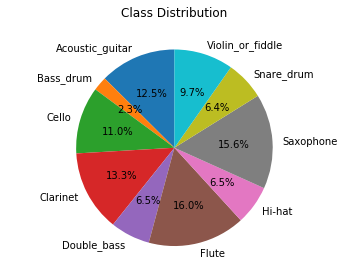

In [2]:
df = pd.read_csv('instruments.csv')
df.set_index('fname', inplace=True)

for f in df.index:
    rate, signal = wavfile.read('clean/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [3]:
class Config:
    def __init__(self,mode='conv',nfilt=26,nfeat=13,nfft=512,rate=16000):
        self.mode=mode
        self.nfilt = nfilt
        self.nfeat = nfeat
        self.nfft = nfft
        self.rate =rate
        self.step = int(rate/10)
        self.model_path = os.path.join('models', mode+'.model')
        self.p_path = os.path.join('./pickels', mode + '.p')
        self.data = None


### Here we explore the data once agian
##### lets print the data frame

In [4]:
df

,label,length
fname,,
5388d14d.wav,Saxophone,4.140000
c685f05f.wav,Saxophone,1.540000
36d20ab5.wav,Saxophone,4.890562
d6665734.wav,Saxophone,10.165812
7352e28f.wav,Saxophone,6.240000
...,...,...
3c713bcf.wav,Clarinet,5.517938
2fc00271.wav,Clarinet,3.786188
b0c06255.wav,Clarinet,3.831000


In [9]:
config = Config()
device = 'cpu'

In [ ]:
def check_data():
    if os.path.isfile(config.p_path):
        print ('Loading existing data from {} model'.format(config.mode))
        with open(config.p_path,'rb') as handle:
            tmp = pickle.load(handle)
            return tmp
    else:
        return None

In [6]:
def return_sample(dummy) :
    rand_class = np.random.choice(class_dist.index,p=prob_dist)
    file = np.random.choice(df[df.label==rand_class].index)
    rate, wav = wavfile.read('clean/'+file)
    label = df.at[file,'label']
    # After we loaded a random file take random window
    # of signal from it, the length of the window is
    # set in the configuration object 
    # and return the MFCC of that window
    #############################################
                    #YOUR CODE HERE#
    
    #############################################

    return X_sample,classes.index(label)


In [8]:
import multiprocessing

def build_rand_feat():
    tmp = check_data()
    if tmp:
        print ('data exist')
        return tmp.data[0], tmp.data[1]
    
    X = []
    y = []
    _min,_max = float('inf'),-float('inf')
    pool = multiprocessing.Pool(4)
    total_samples = 200000
    results= list(tqdm(pool.imap_unordered(return_sample,range(total_samples)),total=total_samples))
    pool.close()
    for result in results :
        _min = min(np.amin(result[0]),_min)
        _max = max(np.amin(result[0]),_max)
        X.append(result[0])
        y.append(result[1])


    config.min = _min
    config.max = _max
    X,y = np.array(X), np.array(y)
    
    
    #Normlize the X data to be on [0,1] scale
    #############################################
                    #YOUR CODE HERE#
    raise NotImplementedError

    #############################################
    

    
    config.data = (X,y)
    
    with open('./pickels/conv.p','wb') as handle:
        pickle.dump(config,handle,protocol=2)
        
    return X,y

## Now is the model building part
### below is a Keras syntax for a CNN, consider at a pseudo code for your network
### and reconstruct it as pytorch model
### (if you are brave enoght go on network of your own)

In [ ]:

# model.add(Conv2D(16,(3,3),activation='relu',strides=(1,1),padding='same',input_shape=input_shape))
# model.add(Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='same'))
# model.add(Conv2D(64,(3,3),activation='relu',strides=(1,1),padding='same'))
# model.add(Conv2D(128,(3,3),activation='relu',strides=(1,1),padding='same'))
# model.add(MaxPool2D((2,2)))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(10,activation='softmax'))


In [12]:
class ConvNet(torch.nn.Module):

    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
          
        #############################################
                        #YOUR CODE HERE#
        raise NotImplementedError

        #############################################

        
    def forward(self, x):
        
              
        #############################################
                        #YOUR CODE HERE#
        raise NotImplementedError

        #############################################

        
        return logits, probas

In [ ]:
X,y = build_rand_feat()

In [ ]:
model = ConvNet(10).to(device)

In [ ]:
train_loader = DataLoader(dataset=list(zip(X.reshape(200000,1,9,13),y)), 
                          batch_size=1000, 
                          shuffle=True)

In [13]:
def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    for features, targets in data_loader:
        features = features.to(device).float()
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100
    

start_time = time.time()
learning_rate = 0.01
num_epochs = 30
# optimizer = #set the optimizer to SGD#
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        ## Train your model
        
        
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), cost))
    
    model = model.eval()
    print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
          epoch+1, num_epochs, 
          compute_accuracy(model, train_loader)))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

NameError: name 'model' is not defined